In [5]:
##Student performance Indicator

# Life cycle of Machine learning Project
# Understanding the Problem Statement
# Data Collection
# Data Checks to perform
# Exploratory data analysis
# Data Pre-Processing
# Model Training
# Choose best model

In [6]:
# 1) Problem statement
# This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

In [7]:
#imporing libraries

import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

%matplotlib inline
import warnings

warnings.filterwarnings('ignore')


In [12]:
df = pd.read_csv("data/StudentsPerformance.csv", )
pd.set_option('display.max_columns', None)

In [13]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [14]:
df.shape

(1000, 8)

In [15]:
df['race/ethnicity'].value_counts()

race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

In [16]:
df['gender'].value_counts()

gender
female    518
male      482
Name: count, dtype: int64

In [18]:
df['lunch'].value_counts()

lunch
standard        645
free/reduced    355
Name: count, dtype: int64

In [19]:
df['parental level of education'].value_counts()

parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

In [21]:
#checking for null values
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [22]:
df.duplicated().sum()

0

In [23]:
#check null and dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [24]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [25]:
df.shape

(1000, 8)

In [26]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [28]:
# #Insight
# From above description of numerical data, all means are very close to each other - between 66 and 68.05;
# All standard deviations are also close - between 14.6 and 15.19;
# While there is a minimum score 0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17

In [29]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

Categories in 'gender' variable:      ['female' 'male']


In [36]:
# define numerical & categorical columns

numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
numeric_features

categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
categorical_features 


['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

In [37]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [38]:
#adding columns for total score and average

df['total score'] =  df['math score'] + df['reading score'] + df['writing score']



In [39]:
df['average_score'] = df['total score']/3 

In [40]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'total score', 'average_score'],
      dtype='object')

In [56]:
#Homw many students got full marks in each subjects

reading_full = df[df['reading score'] == 100]['reading score'].count()

math_score = df[df['math score'] == 100]['math score'].count()

writing_score = df[df['writing score'] == 100]['writing score'].count()

In [57]:
print('Number of students with full marks in reading :', reading_full)

print('Number of students with full marks in writing :', writing_score)

print('Number of students with full marks in math :', math_score)

Number of students with full marks in reading : 17
Number of students with full marks in writing : 14
Number of students with full marks in writing : 7


In [60]:
#Number of students less than 20 marks

reading_less_20 =  df[df['reading score']<= 20]['reading score'].count()
math_less_20 =  df[df['math score']<= 20]['math score'].count()
writing_less_20 =  df[df['writing score']<= 20]['writing score'].count()

In [62]:
print("Number of students with less than 20 marks in maths:", math_less_20)

print("Number of students with less than 20 marks in reading:", reading_less_20)

print("Number of students with less than 20 marks in writing:", writing_less_20)

Number of students with less than 20 marks in maths: 4
Number of students with less than 20 marks in reading: 1
Number of students with less than 20 marks in writing: 3


In [63]:
# Insights
# From above values we get students have performed the worst in Maths
# Best performance is in reading section

In [64]:
#Exploratory Data Analysis

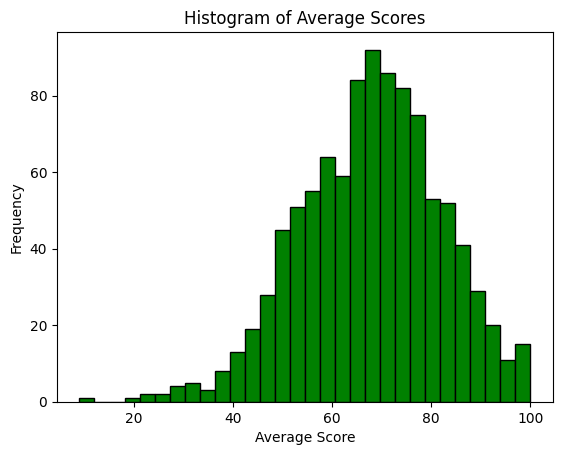

In [70]:
plt.hist(df['average_score'], bins=30, color='green', edgecolor='black')
plt.title('Histogram of Average Scores')
plt.xlabel('Average Score')
plt.ylabel('Frequency')
plt.show()



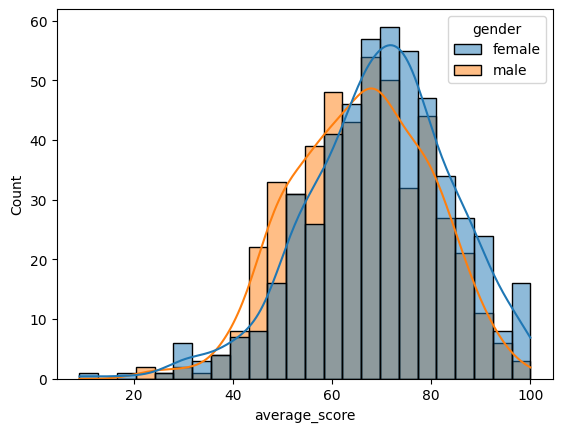

In [71]:
sns.histplot(data=df,x='average_score',kde=True,hue='gender')
plt.show()

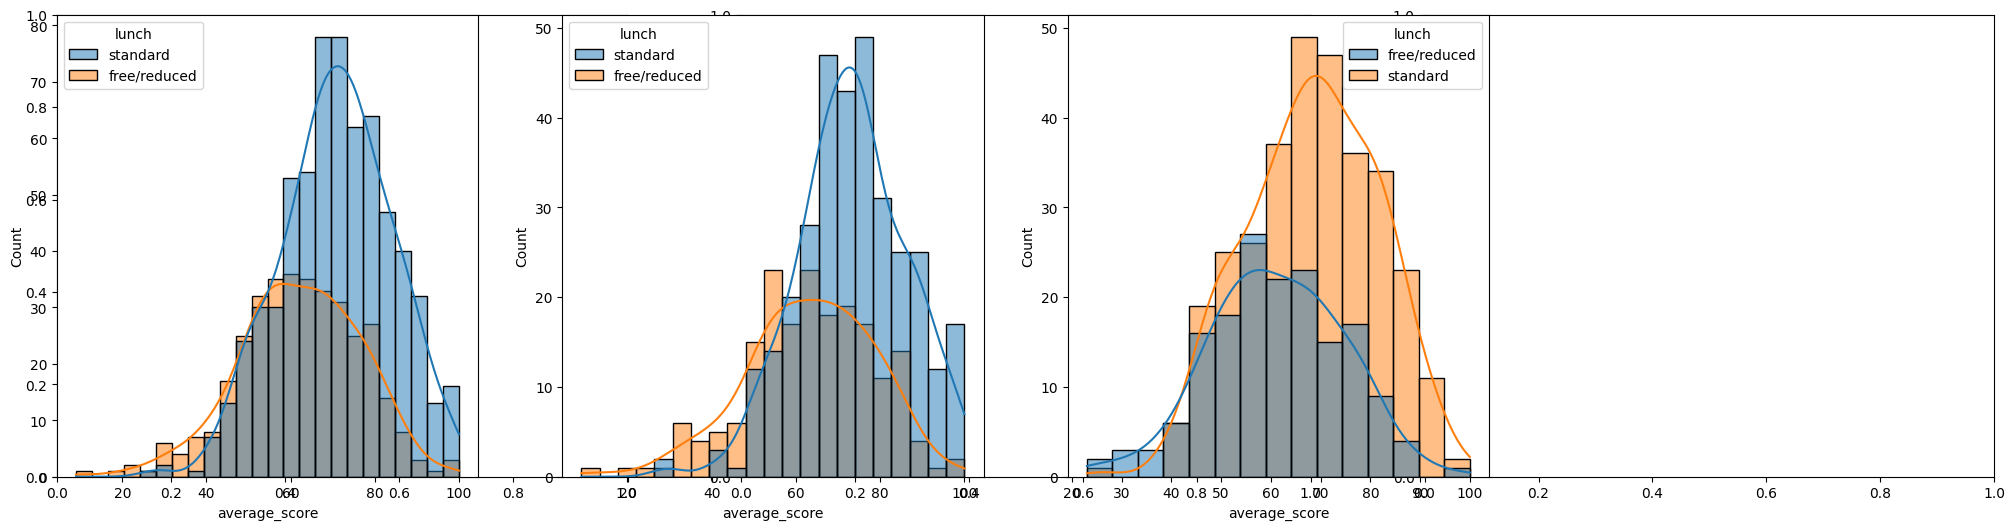

In [73]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)

sns.histplot(data=df,x='average_score',kde=True,hue='lunch')
plt.subplot(142)

sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='lunch')
plt.subplot(143)

sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='lunch')
plt.show()

In [74]:
# Insights
# Standard lunch helps perform well in exams.
# Standard lunch helps perform well in exams be it a male or a female.

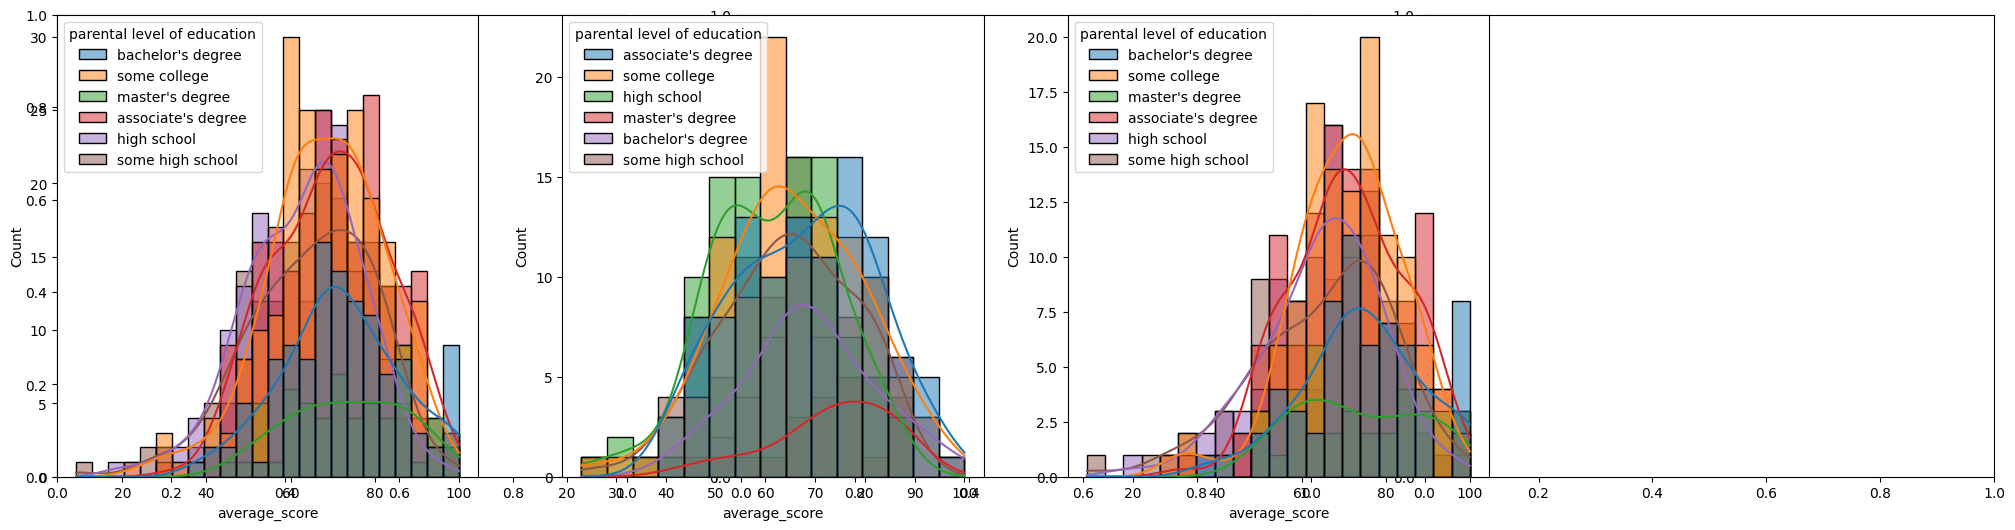

In [76]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)

ax =sns.histplot(data=df,x='average_score',kde=True,hue='parental level of education')
plt.subplot(142)

ax =sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='parental level of education')
plt.subplot(143)

ax =sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='parental level of education')
plt.show()

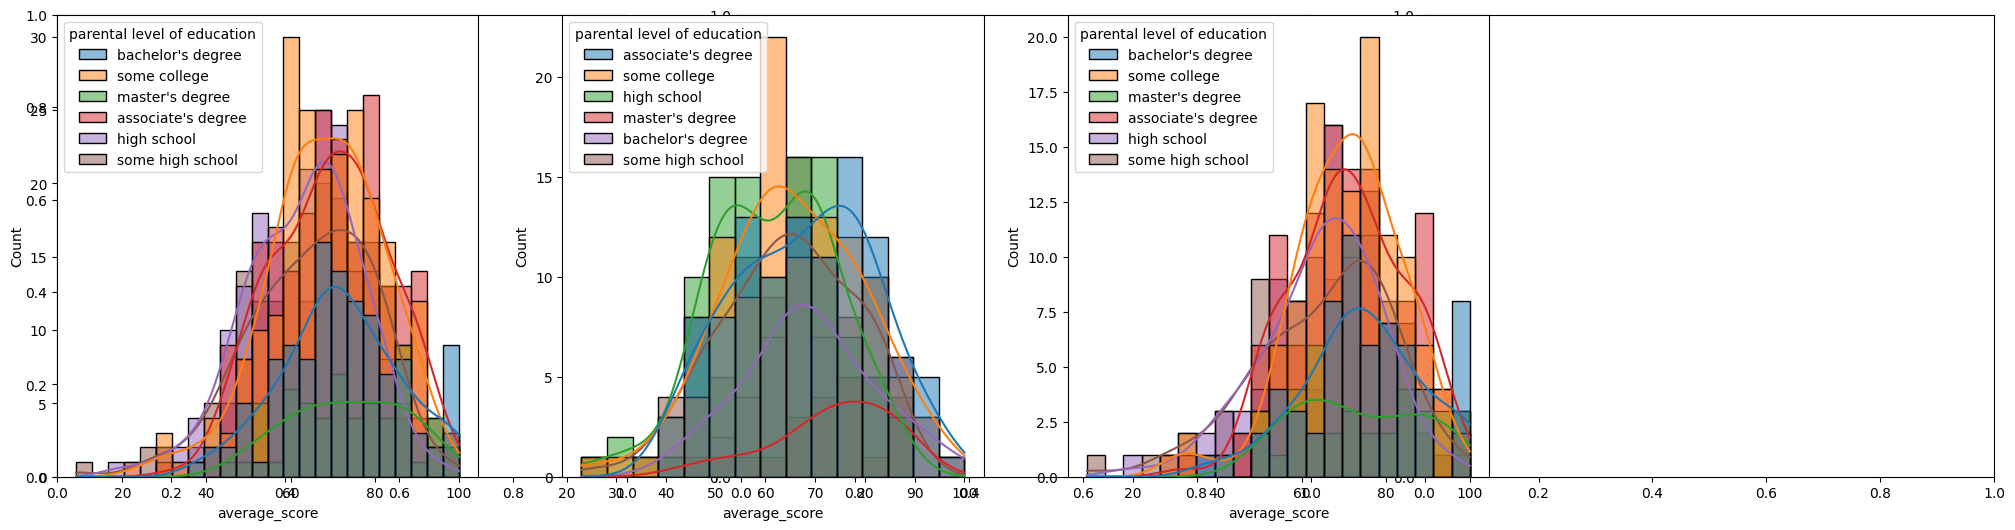

In [77]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average_score',kde=True,hue='parental level of education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='parental level of education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='parental level of education')
plt.show()

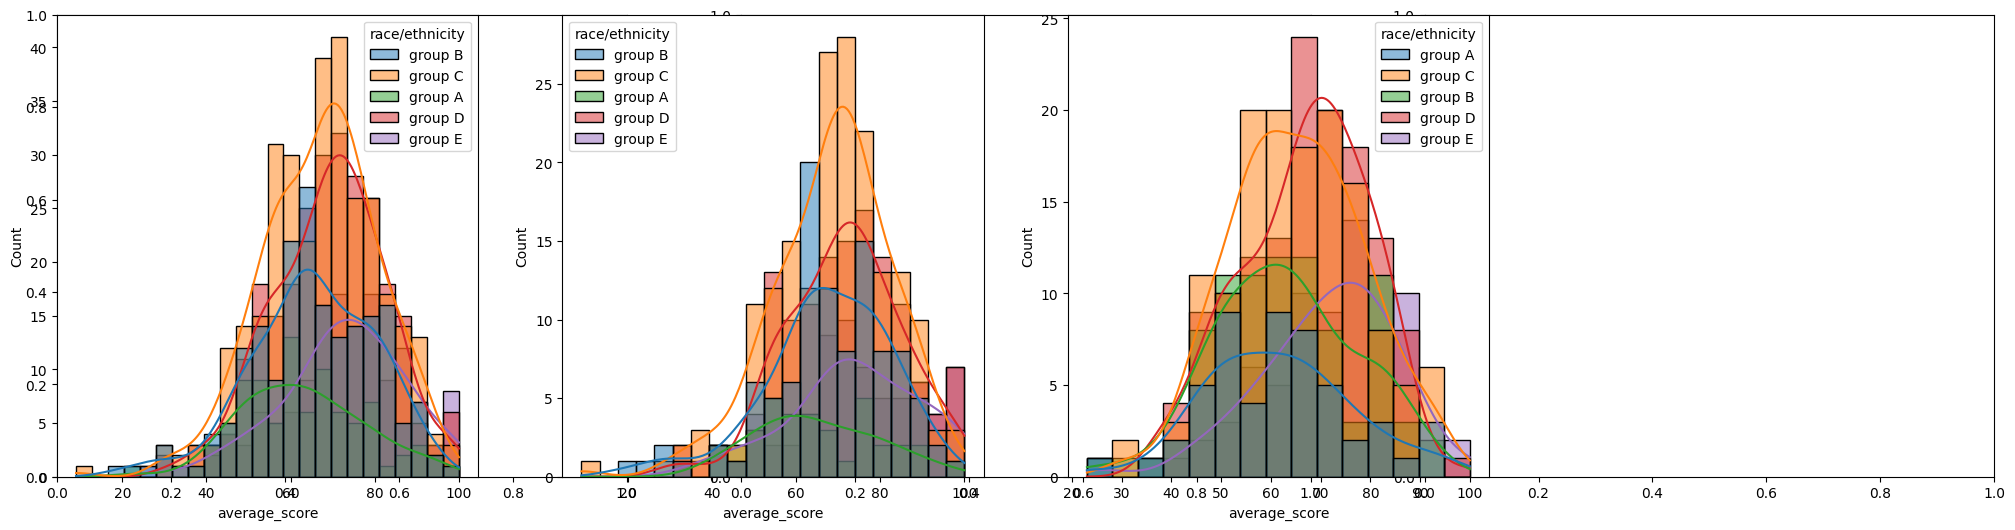

In [78]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average_score',kde=True,hue='race/ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='race/ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='race/ethnicity')
plt.show()

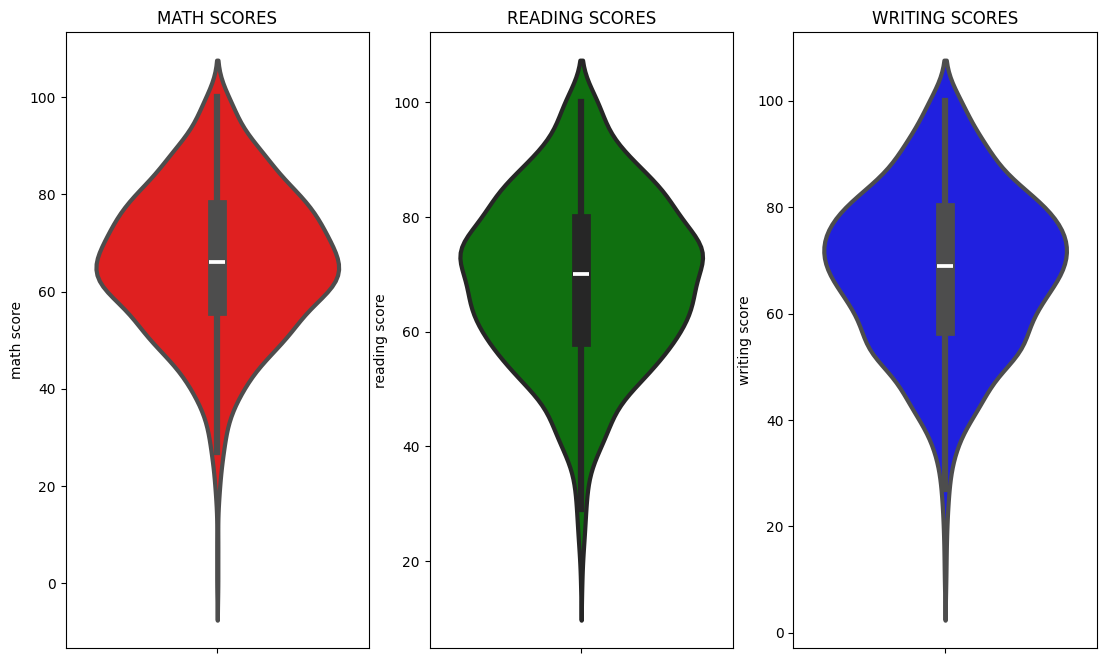

In [79]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')

sns.violinplot(y='math score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=df,color='blue',linewidth=3)
plt.show()

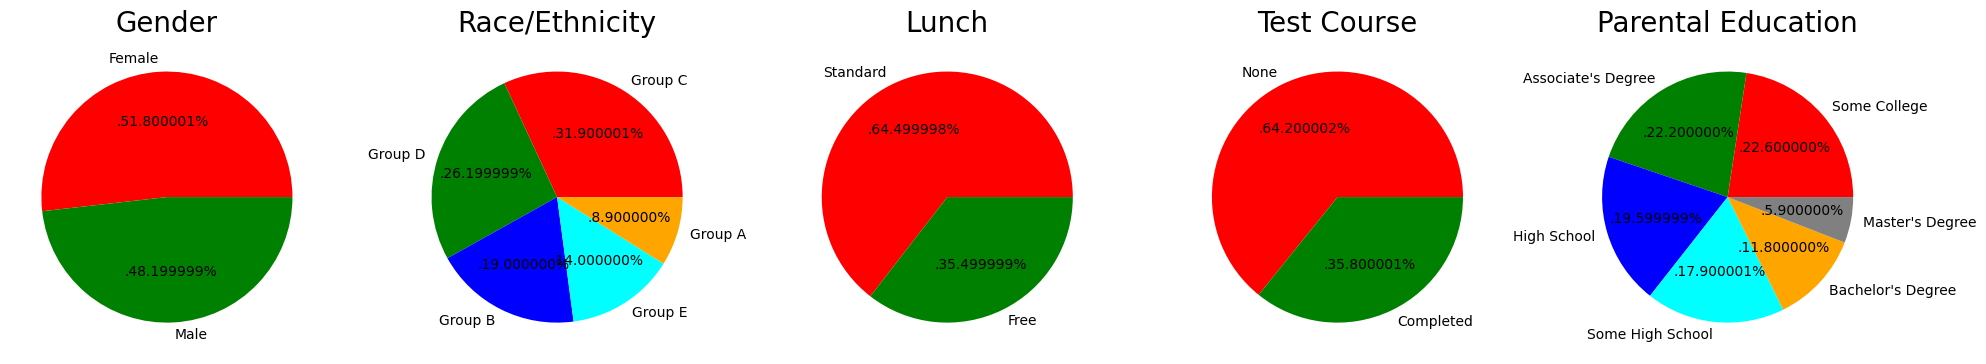

In [84]:
plt.rcParams['figure.figsize'] = (20, 8)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

In [85]:
# Insights
# Number of Male and Female students is almost equal
# Number students are greatest in Group C
# Number of students who have standard lunch are greater
# Number of students who have not enrolled in any test preparation course is greater
# Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

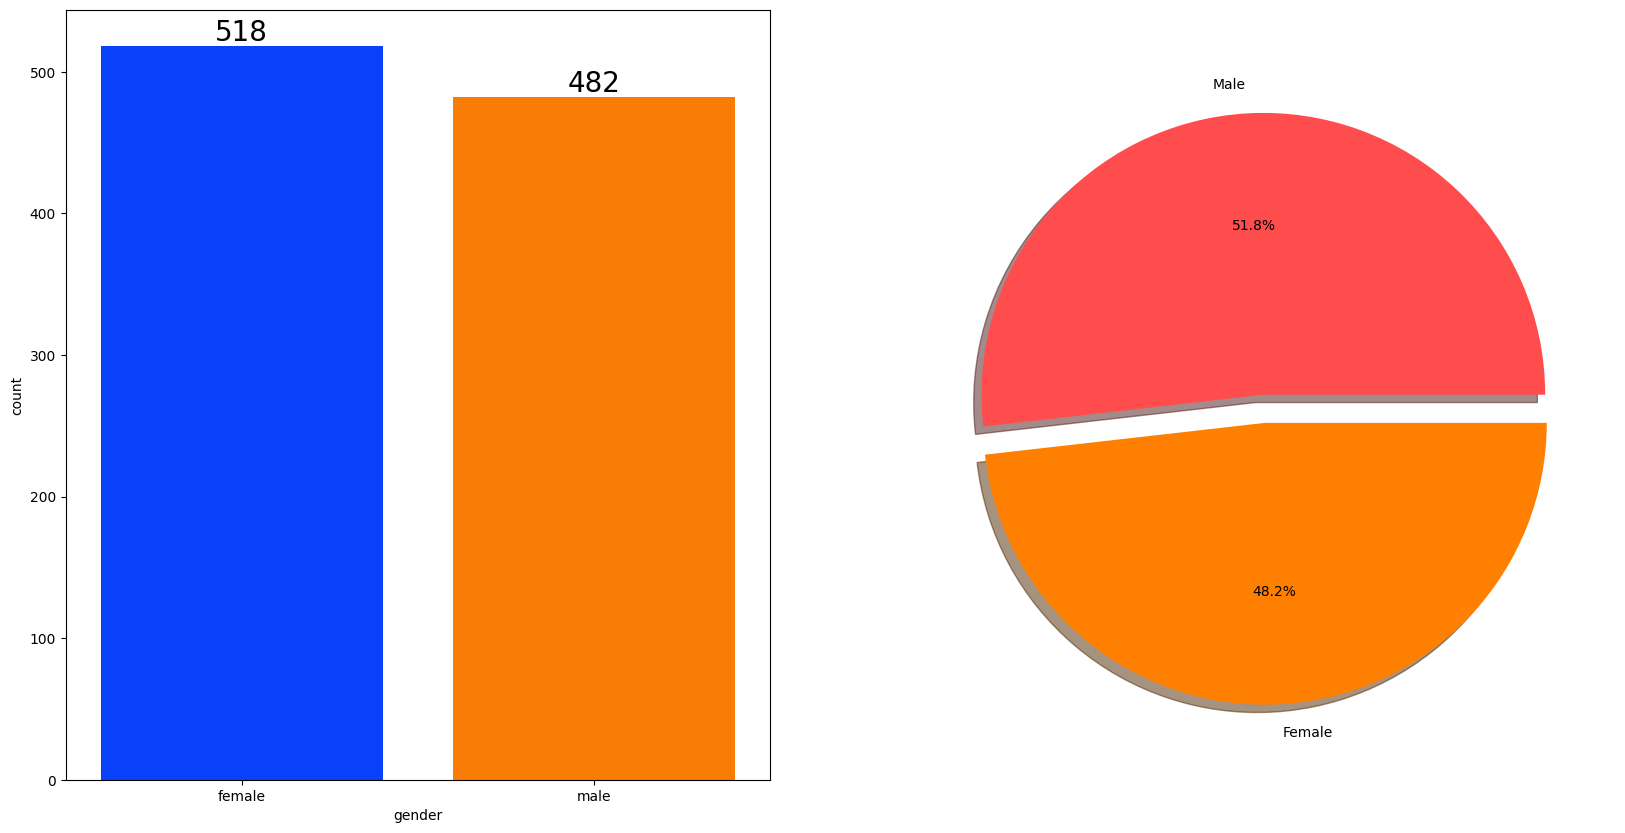

In [86]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

In [87]:
# Insights
# Gender has balanced data with female students are 518 (48%) and male students are 482 (52%)

In [93]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'total score', 'average_score'],
      dtype='object')

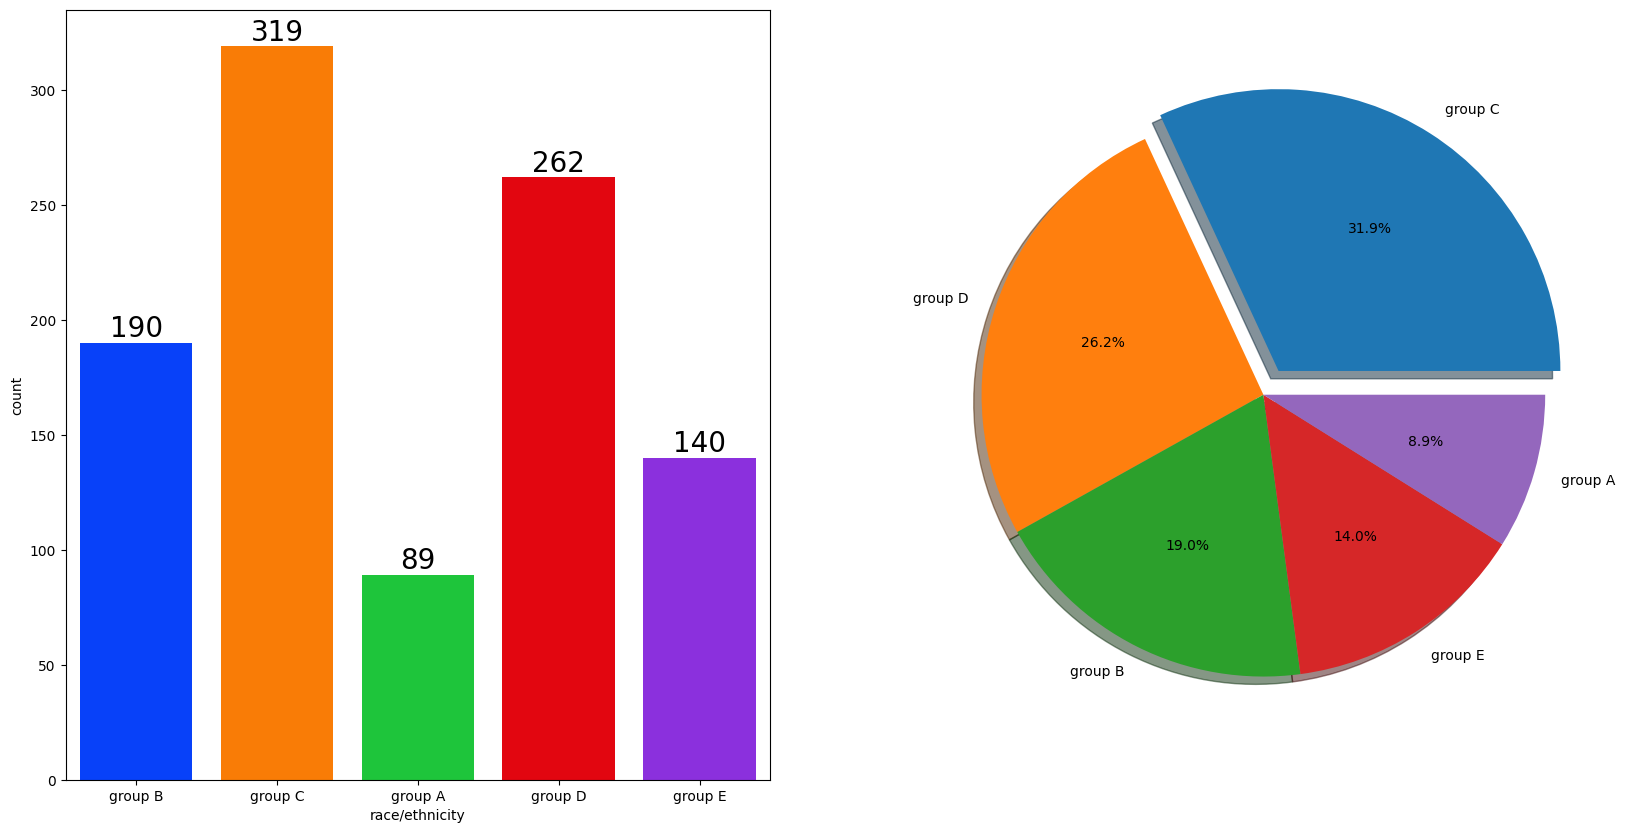

In [95]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race/ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race/ethnicity'].value_counts(),labels=df['race/ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()  

In [96]:
# Insights
# Most of the student belonging from group C /group D.
# Lowest number of students belong to groupA.

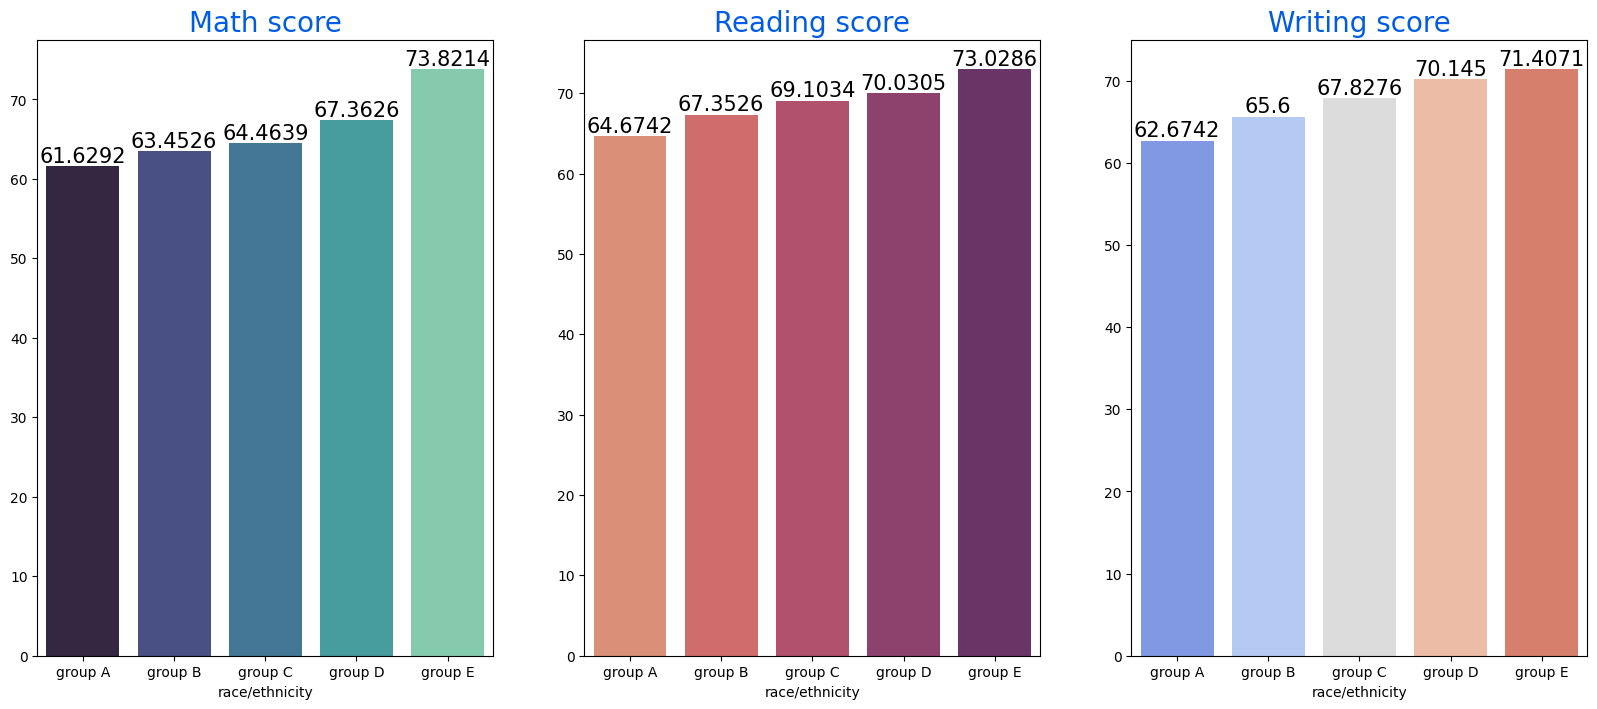

In [97]:
Group_data2=df.groupby('race/ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math score'].mean().index,y=Group_data2['math score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading score'].mean().index,y=Group_data2['reading score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing score'].mean().index,y=Group_data2['writing score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

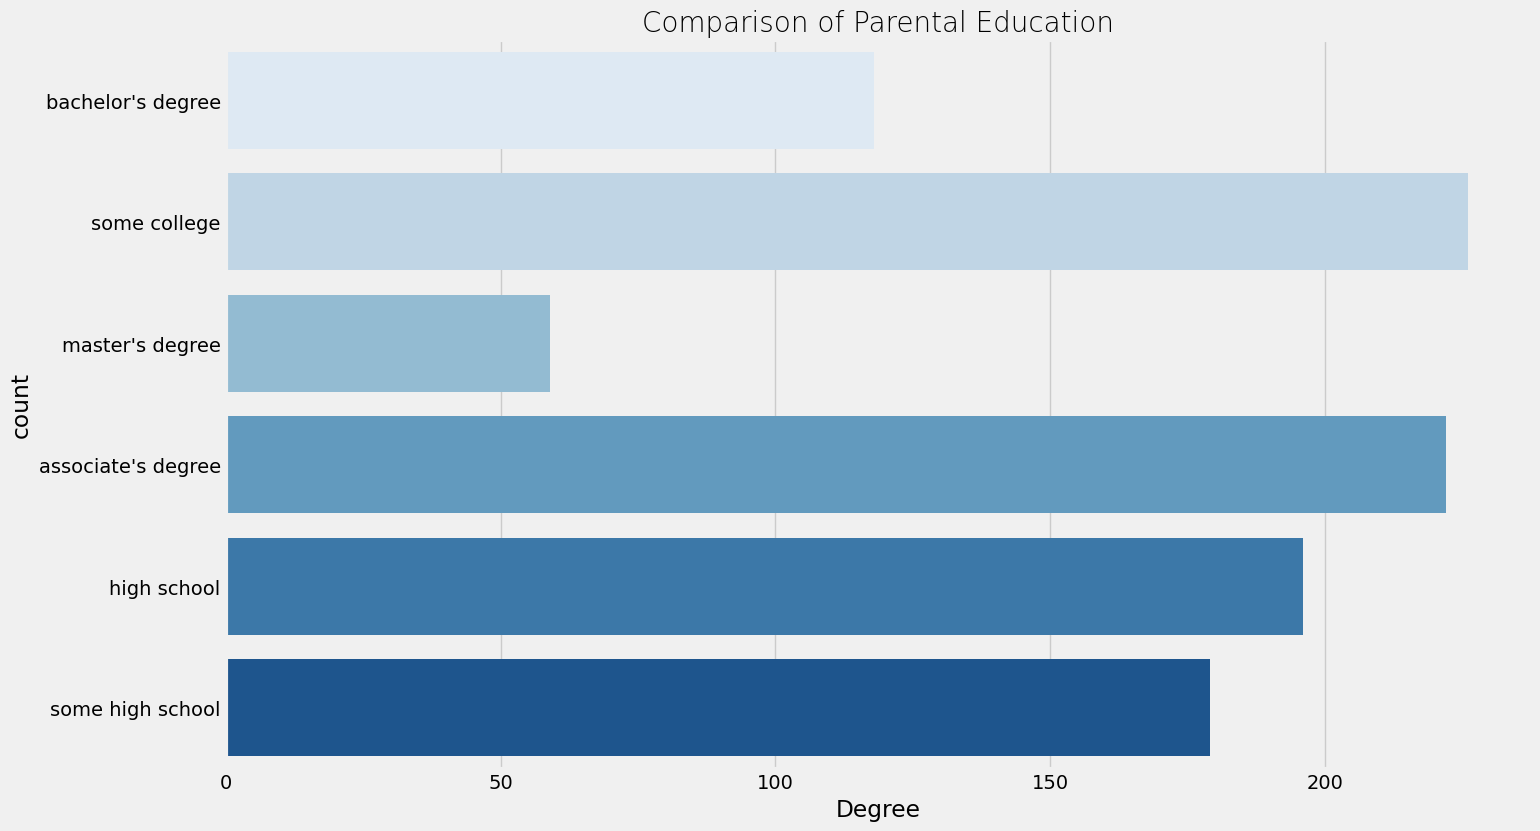

In [98]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental level of education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

In [99]:
# 4.4.3 PARENTAL LEVEL OF EDUCATION COLUMN
# What is educational background of student's parent ?
# Is parental education has any impact on student's performance ?

In [101]:
#BIVARIATE ANALYSIS ( Is parental education has any impact on student's performance ? )

In [106]:
# Assuming df is your DataFrame
df['average_score'] = pd.to_numeric(df['average_score'], errors='coerce')


In [108]:
df.dtypes

gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                       int64
reading score                    int64
writing score                    int64
total score                      int64
average_score                  float64
dtype: object

In [110]:
df['average_score'].isnull().sum()

0

In [113]:
unique_values = df['average_score'].unique()
print(unique_values)

[ 72.66666667  82.33333333  92.66666667  49.33333333  76.33333333
  77.33333333  91.66666667  40.66666667  65.          54.66666667
  45.          73.          73.33333333  53.66666667  74.
  87.66666667  26.          44.66666667  57.66666667  66.
  70.          50.33333333  71.66666667  75.          59.33333333
  70.33333333  68.33333333  69.          72.33333333  63.
  64.33333333  40.          88.66666667  80.33333333  79.33333333
  84.33333333  56.66666667  66.33333333  58.66666667  63.33333333
  53.33333333  60.66666667  71.          82.66666667  52.
  71.33333333  46.33333333  80.66666667  39.          58.33333333
   9.          37.33333333  64.          39.66666667  68.66666667
  64.66666667  60.33333333  46.66666667  58.          41.
  79.66666667  48.66666667  38.33333333  78.33333333  72.
  32.33333333  73.66666667  46.          85.66666667  62.33333333
  88.33333333  91.33333333  65.66666667  95.66666667  88.
  55.33333333  51.33333333  54.33333333  99.66666667  86.66666667


In [114]:
df['average_score'] = pd.to_numeric(df['average_score'], errors='coerce')


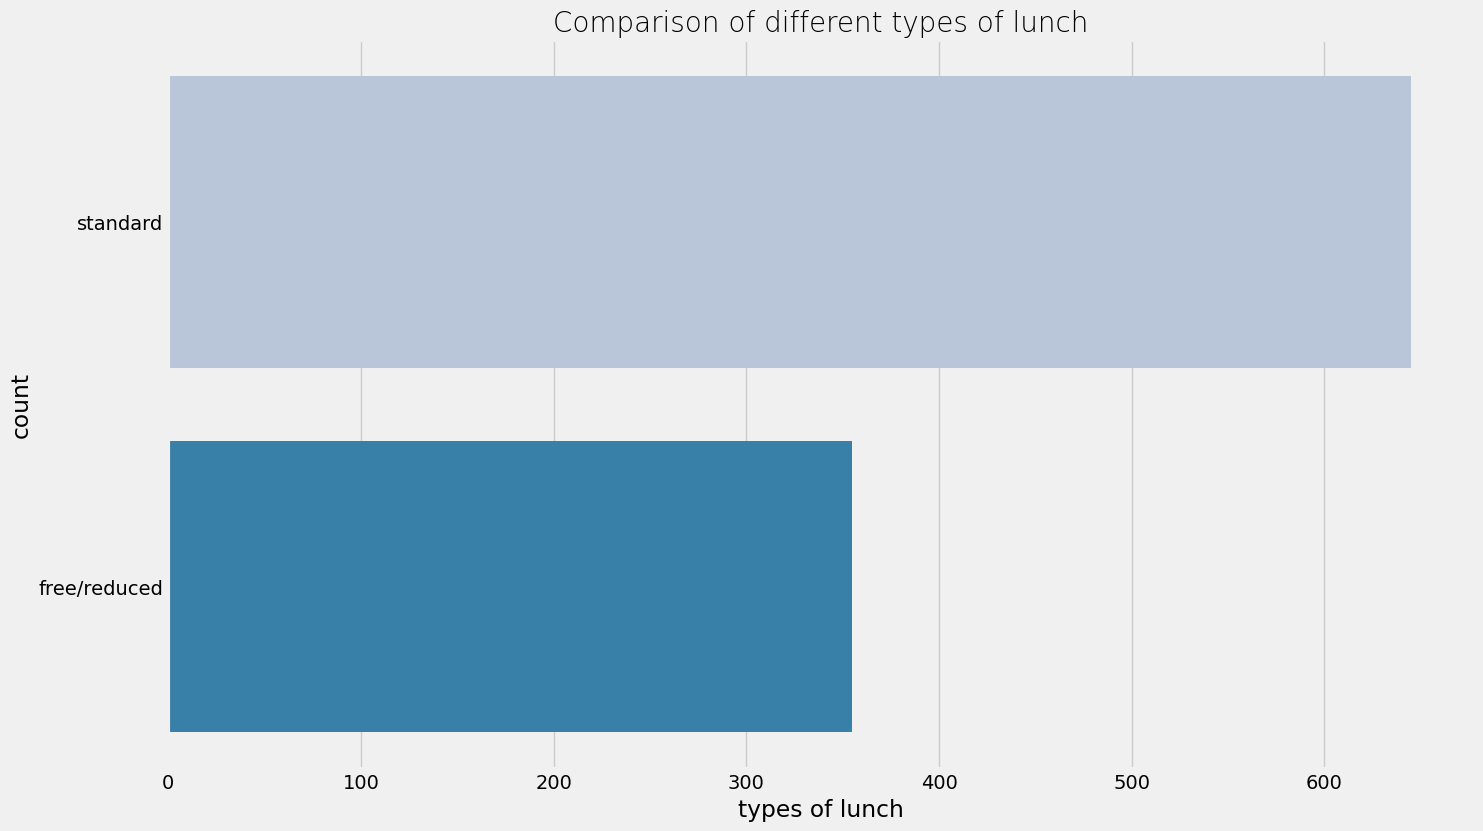

In [120]:
plt.rcParams['figure.figsize'] = (15, 9)

sns.countplot(df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

In [121]:
#BIVARIATE ANALYSIS ( Is lunch type intake has any impact on student's performance ? )

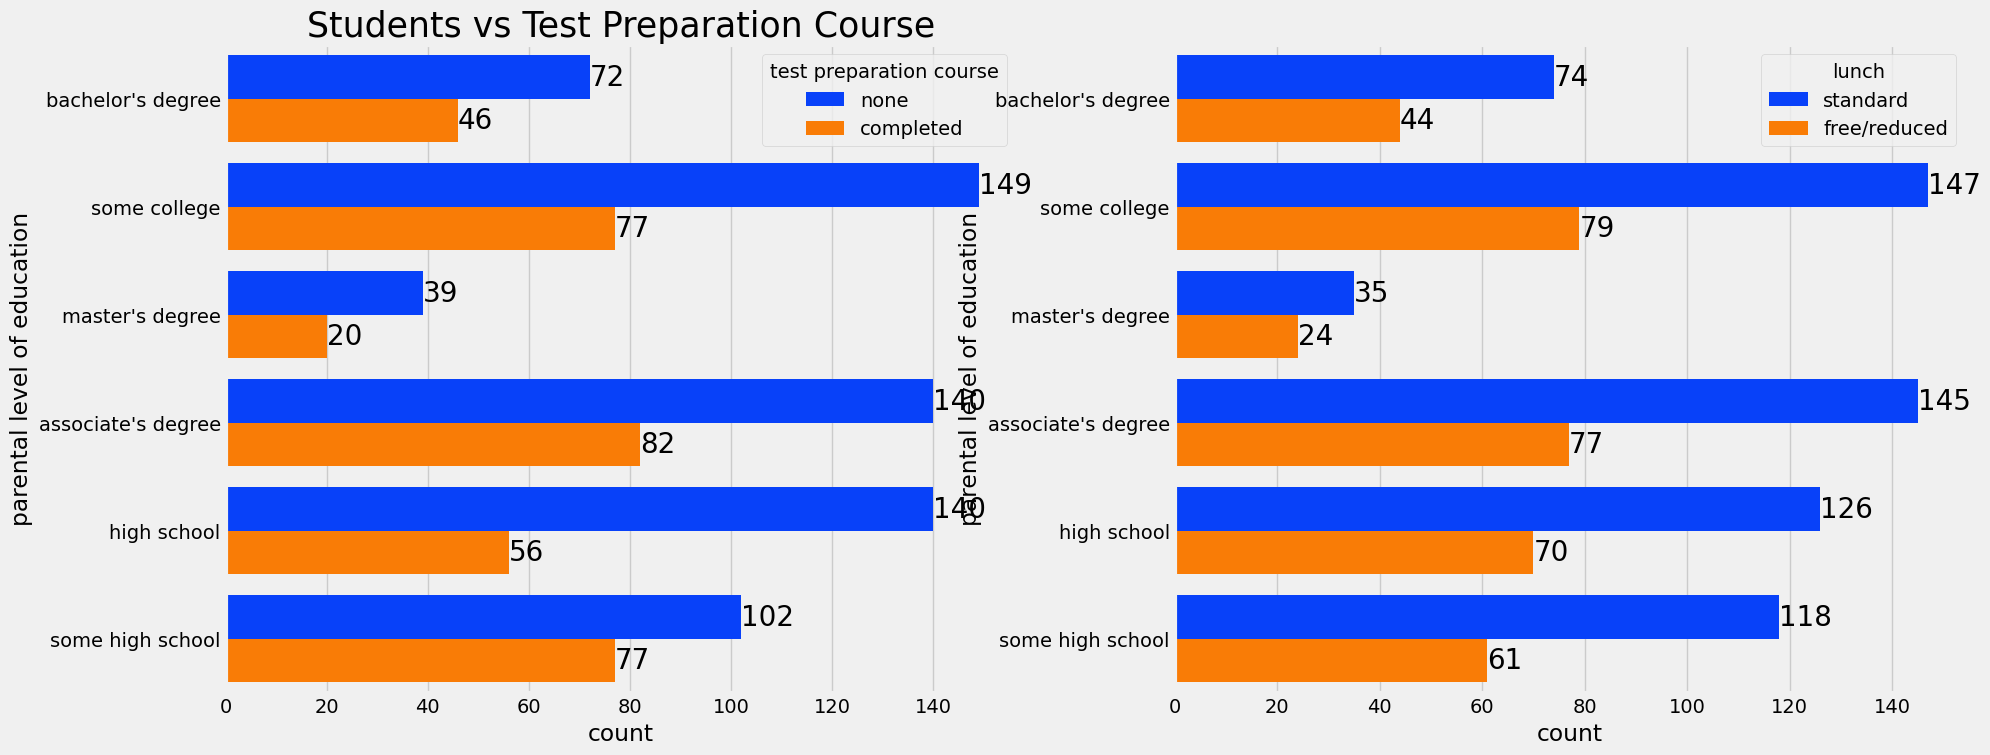

In [124]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.rcParams['figure.figsize'] = (15, 9)

# Create subplots with a horizontal layout
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Plot the count of students vs test preparation course
sns.countplot(y='parental level of education', data=df, palette='bright', hue='test preparation course',
              saturation=0.95, ax=axes[0])
axes[0].set_title('Students vs Test Preparation Course', color='black', size=25)
for container in axes[0].containers:
    axes[0].bar_label(container, color='black', size=20)

# Plot the count of students vs lunch
sns.countplot(y='parental level of education', data=df, palette='bright', hue='lunch',
              saturation=0.95, ax=axes[1])
for container in axes[1].containers:
    axes[1].bar_label(container, color='black', size=20)

# Show the plots
plt.show()


In [125]:
# 4.4.5 TEST PREPARATION COURSE COLUMN
# Which type of lunch is most common amoung students ?
# Is Test prepration course has any impact on student's performance ?

<Axes: xlabel='lunch', ylabel='writing score'>

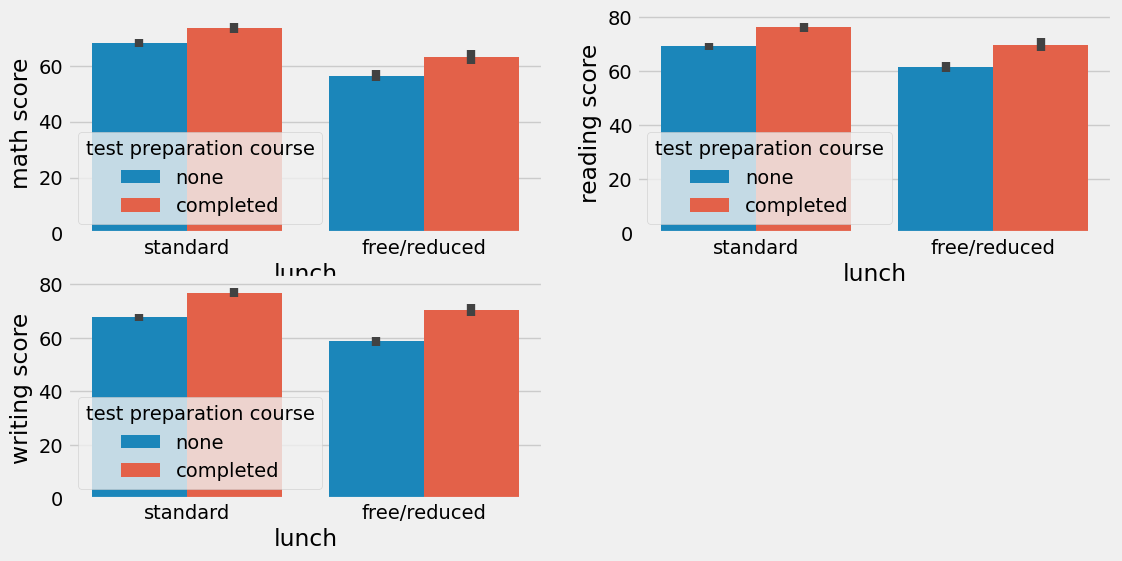

In [127]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math score'], hue=df['test preparation course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading score'], hue=df['test preparation course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing score'], hue=df['test preparation course'])

In [128]:
# #Insights
# Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

In [129]:
#CHECKING OUTLIERS

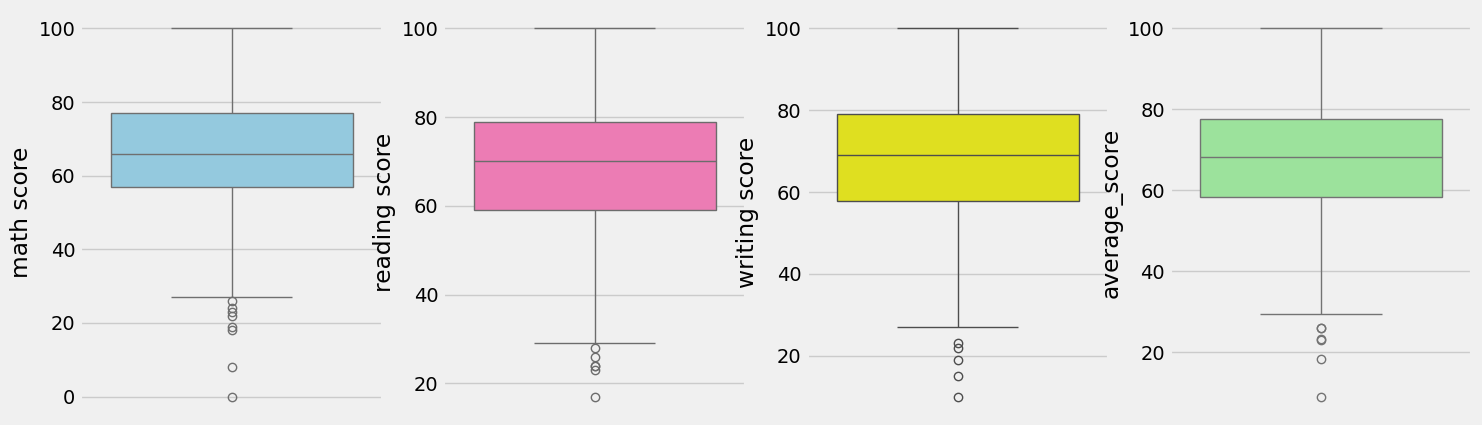

In [131]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average_score'],color='lightgreen')
plt.show()

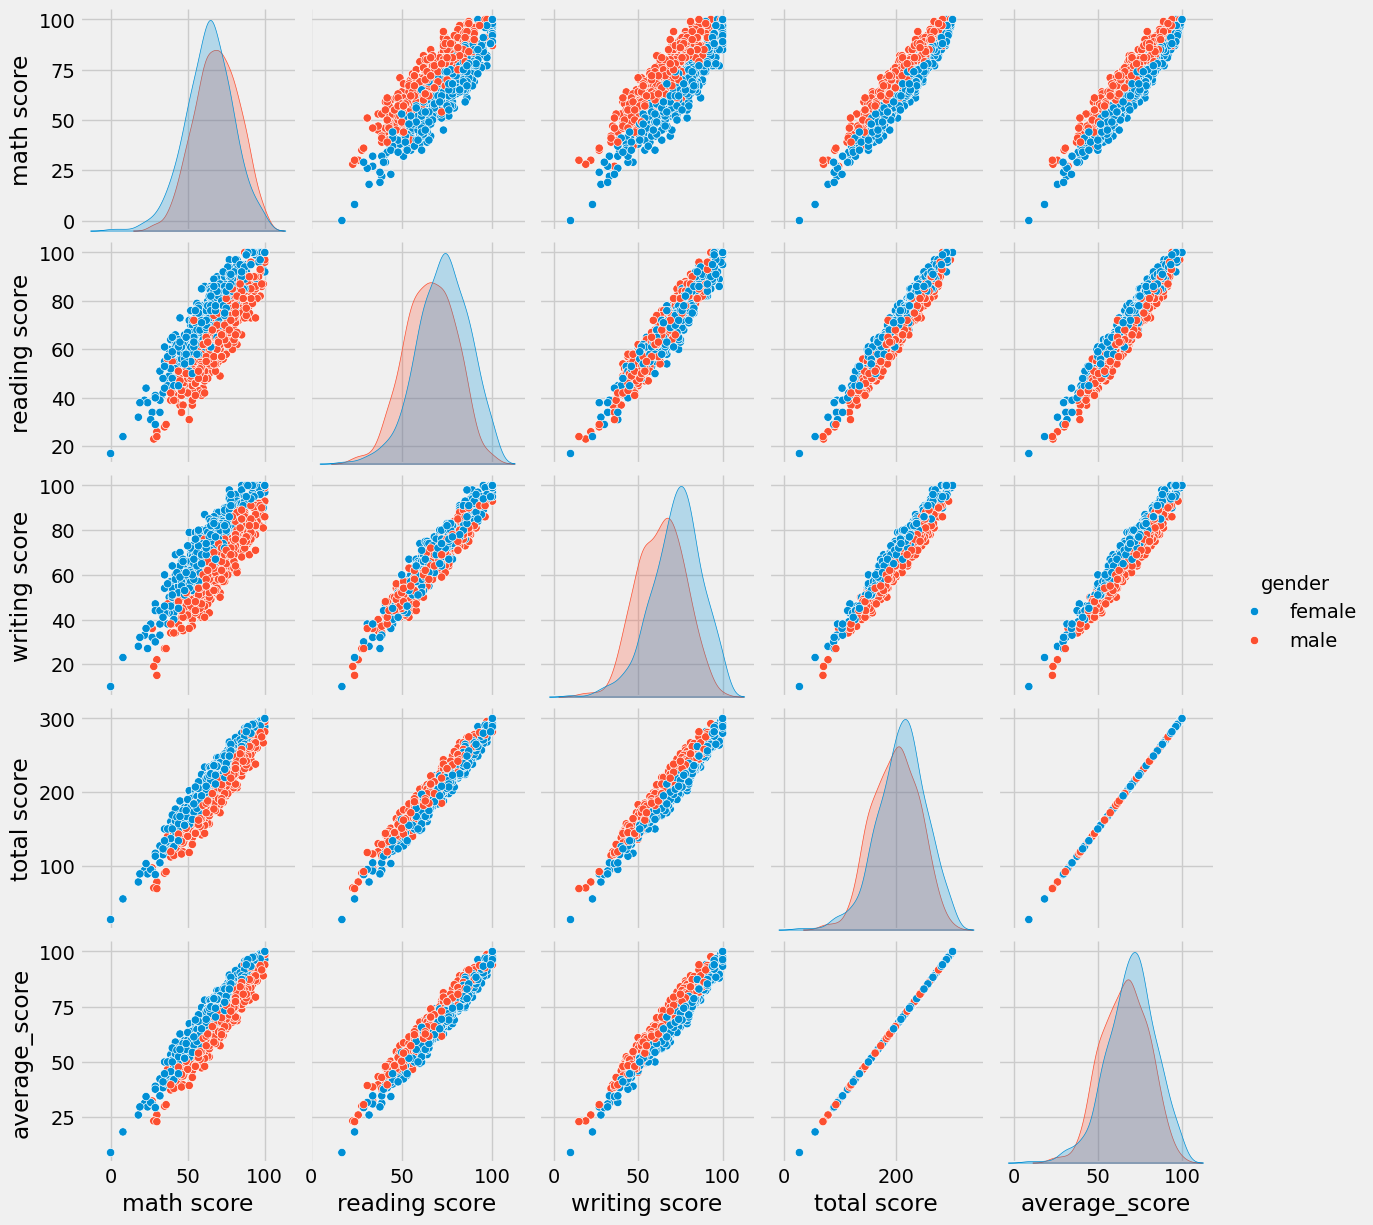

In [132]:
sns.pairplot(df,hue = 'gender')
plt.show()

In [133]:
# Insights
# From the above plot it is clear that all the scores increase linearly with each other.

In [134]:
#  Conclusions
# Student's Performance is related with lunch, race, parental level education
# Females lead in pass percentage and also are top-scorers
# Student's Performance is not much related with test preparation course
# Finishing preparation course is benefitial.